# Abalone

My analysis of the abalone dataset.

### Overview

This dataset includes various physical measurements related to abalone, a type of sea snail. The objective of this data analysis is to analyse the various measurements and the relationship between the height and weight of abalone. This relationship can provide an insight into the development of abalone.

The data set is divided into two measurements, length (in mm) and weight (in grams), length is divided into the length of the shell, the diameter and the height. While weight considers the whole weight of the abalone, the weight of the meat, the gut weight and the shell weight. Each abalone are divided into three categories: male, female and infant. And finally the traditional more time consuming marker of abalone age; ring number, have also been included. 

In [579]:
# Data frames.
import pandas as pd

### Pandas
Pandas is a Python library. It is necessary to work with the abalone data set. With pandas we can read the data and conduct our analysis.

In [580]:
# Load the abalone data set from csv file.
abalone = pd.read_csv("abalone.csv")

The read_csv() function allows us to open our data set and access what's inside.

In [581]:
# To display the first 5 and last 5 samples in the dataset
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Above we can see a small insight into the first 5 and last 5 entries in our dataset. Along the top we can see our variable: sex, length, diameter, height, etc. The left-hand side column shows the number of the entry, beginning with 0 until 4176. We can see from this tiny glimpse that most of the variables are *floats* or decimals, except for the "sex" and "rings" variables which are *strings* (or text) and *integers* (whole numbers), respectively.

### Python Types

#### Number Columns
Length, diameter, height, whole weight, shucked weight, viscera weight and shell weight are all expressed using decimals and so the appropriate data type for these columns is __float__. This allows python to interpret the precise decimals in our measurements.

#### Discrete Number Columns
The number of rings an abalone has is expressed using whole numbers or integers, where decimals are not present. In this case **int** is appropriate.

#### Category Columns
The sex of the abalone is categorised in three ways: Male, Female and Infant or M, F and I. As these are not expressed with numbers, they will be stored as categorical data using **category**.

In [582]:
# using pandas to describe the data set i.e. show number of samples, mean, standard deviation, min and max
description = abalone.describe()

# to print the descriptive statistics
description

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Data Overview
Here we have implemented pandas to provide a concise overview of the data set. This includes the number of samples, in each case 4177, which indicates there are no missing values from the data set. The mean values show us the average measurements for each variable. While the standard deviation shows how much variation there is between each value and the mean. And the min and max represent the smallest value and the largest value within the given variable, in other words, the range of the variables in the dataset. The quartiles 25%, 50% and 75% give us an insight into the distribution or shape of the data set. 

In [583]:
# imports matplotlib so that we can create plots.
import matplotlib.pyplot as plt

### Matplotlib.pyplot
This library allows us to create plots or visuals for our dataset, such as bar charts, histograms and scatter plots. These will make it easier to identify trends, patterns and relationships between variables.

<function matplotlib.pyplot.show(close=None, block=None)>

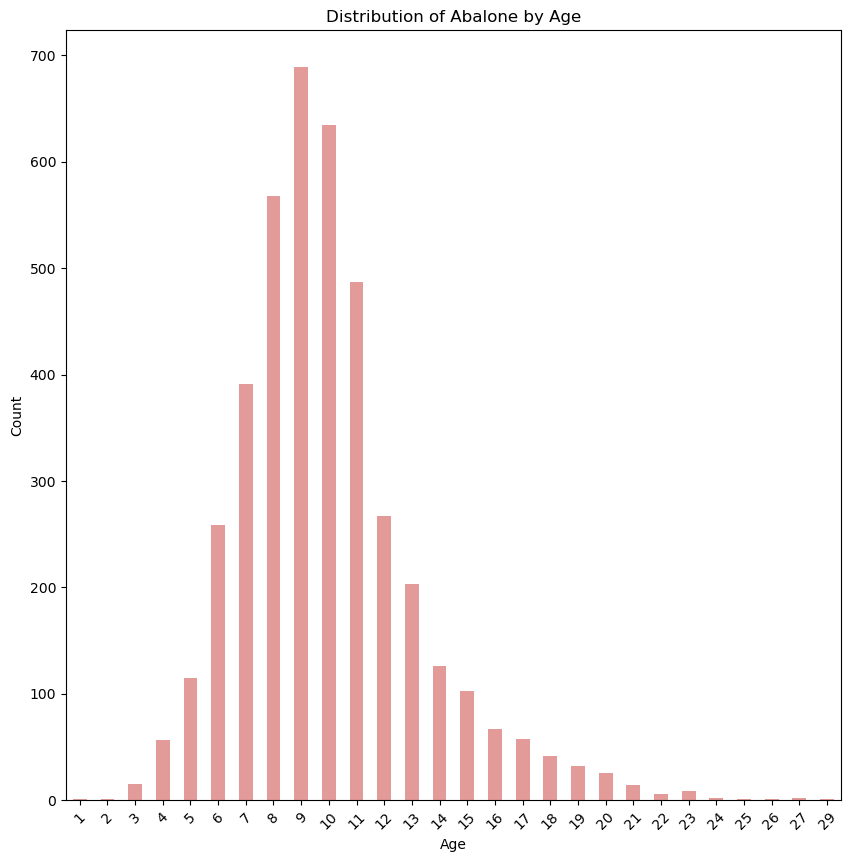

In [584]:
# creates a bar chart to show the distribution of "sex"
plt.figure(figsize=(10, 10)) #width and height
abalone["rings"].value_counts().sort_index().plot(kind="bar", color="#e29b99")
plt.title("Distribution of Abalone by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45) # puts labels at an angle for ease of reading
plt.show

### Abalone Rings Bar Chart 
Here I've created a bar chart in order to visualise the age of the abalone. We can see here that the age or number of rings are positively skewed and that the majority of abalone are 9. We can see the wide range in the age of abalone, ranging from 1 to 29, however we can also see that this large range is caused primarily by outliers, the interquartile range or the difference between the 25th and 75th percentiles shows a range of just 3, between ages 8 and 11. From this we can see that our outlier threshold is between 4 and 16. 

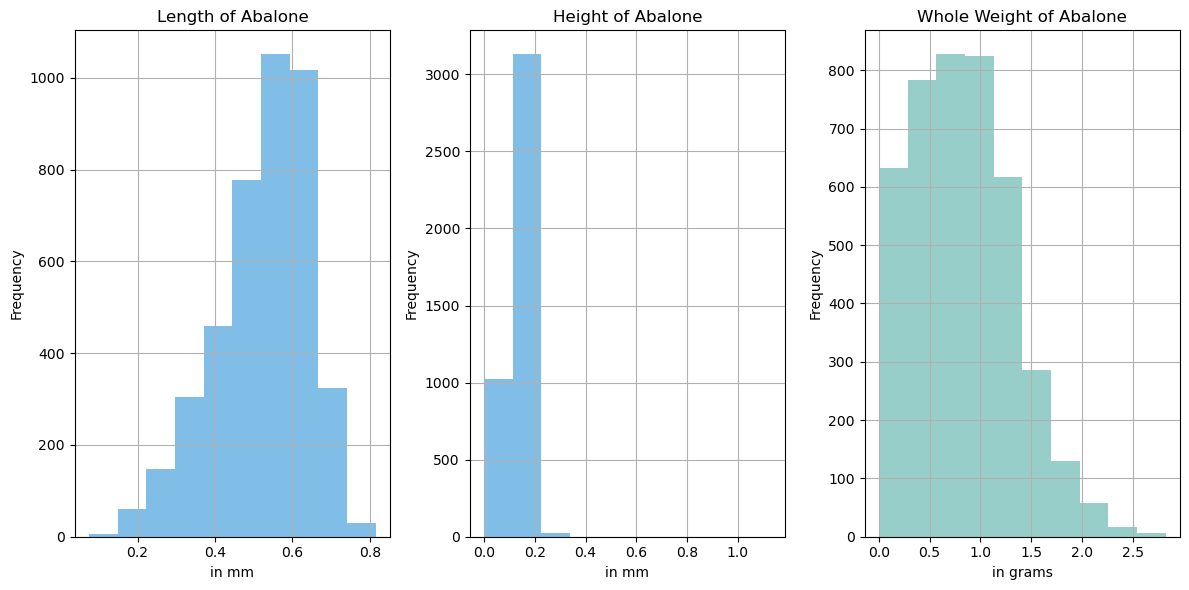

In [585]:
# Creating a subplot of histograms for an overview of 3 variables:
variable_overview, axes= plt.subplots(nrows=1, ncols=3, figsize=(12, 6)) # Creates a four histogram plot, number of rows and columns specified and the size of the figure in inches
abalone["length"].hist(ax=axes[0], color="#4ca3dd", alpha=0.7)  # isolates length column and assigns it to row 1, column 1, alpha refers to the opacity
axes[0].set_xlabel("in mm") # labels the x axis, along the bottom
axes[0].set_ylabel("Frequency") # labels the y axis, up the side
axes[0].set_title("Length of Abalone") # gives a title to this individual histogram

abalone["height"].hist(ax=axes[1], color="#4ca3dd", alpha=0.7)
axes[1].set_xlabel("in mm")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Height of Abalone")

abalone["whole_weight"].hist(ax=axes[2], color="#6bbab3", alpha=0.7) # hexadecimal colour to match abalone colour scheme
axes[2].set_xlabel("in grams")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Whole Weight of Abalone")

plt.tight_layout()  # prevents overlapping of subplots
plt.show()

### Length, Height and Whole Weight Histograms
These histograms allow us to see the general distribution of the data set within the main measurements: length, height, whole weight and number of rings.

#### Length of Abalone
Distribution is negatively skewed, which means that the mean or the average length is lower than the median as it is affected by the lower values. In this case most of the data points are centred around higher values, but the mean can give the impression of abalone being shorter in general, which is not true.

#### Height of Abalone
Distribution is positively skewed with a tiny portion of taller abalone creating a long tail to the right. This creates an extreme range between 0.0 and 1.13mm. However the mean (approx 0.1395mm) is smaller than the median (0.1400mm), this suggests that the right tail has been created by a small amount of very extreme numbers, which can be observed from the histogram, as the number is so small it is not even represented.

#### Whole Weight of Abalone
In this case the distribution is also positively skewed, with a tail to the right. There is a large range in this case but we can see that the majority of values fall in the lower range of weight. The mean value is brought up by the number of heavier outliers and so the median of 0.7995g appears to be a more accurate representation of the data. 

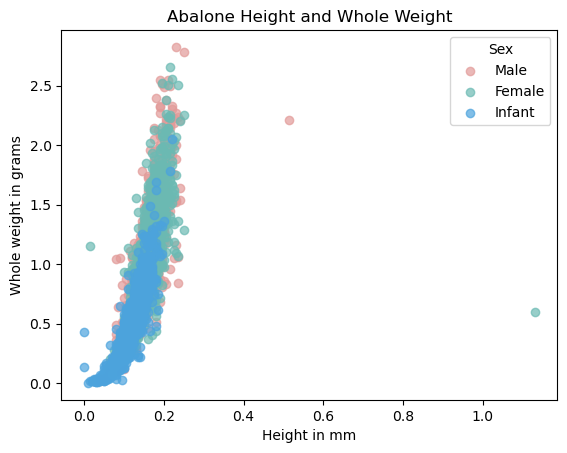

In [586]:
# Seperates the sex for future analysis
male = abalone[abalone["sex"]== "M"]  
female = abalone[abalone["sex"]== "F"]  
infant = abalone[abalone["sex"]== "I"] 

#Creating a scatter plot of height and whole weight
plt.scatter(male['height'], male['whole_weight'], color='#e29b99', alpha=0.7, label='Male')
plt.scatter(female['height'], female['whole_weight'], color='#6bbab3', alpha=0.7, label='Female')
plt.scatter(infant['height'], infant['whole_weight'], color='#4ca3dd', alpha=0.7, label='Infant')
#abalone.plot.scatter(x="height", y="whole_weight", color="#e29b99", alpha=0.7)
plt.xlabel("Height in mm")
plt.ylabel("Whole weight in grams")
plt.title("Abalone Height and Whole Weight")
plt.legend(title="Sex")
plt.show()


### Relationship Between Abalone Height and Weight

As we can see here, there is a strong positive linear relationship, with much of the points clustered around the positive slope. From this we can see that there is a strong relationship between height and weight of abalone: as the height increases so too does the weight. However, we can also see that it is not quite perfect as there are a few outliers, but only very few. From the appearance of this scatter plot, we might infer a very strong positive relationship.

In [587]:
correlation = abalone["height"].corr(abalone["whole_weight"]) #using pandas to determine the Pearson correlation coefficient
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.8192207728553599


#### Pearson Correlation Coeffiecient
The Pearson correlation coefficient determined a correlation of approximately 0.819 which suggests a strong positive correlation between height and whole weight. When one variable increases the other tends to follow. 

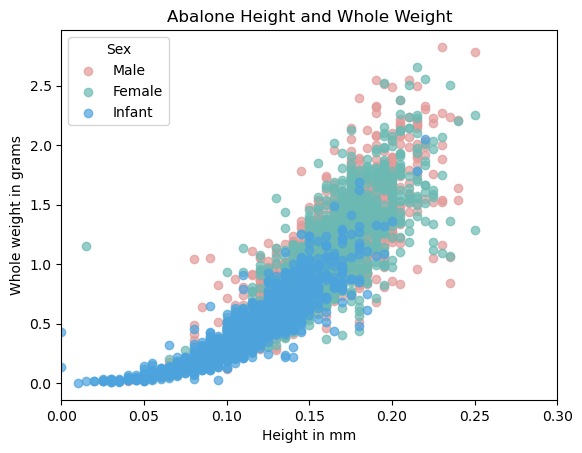

In [588]:

#Creating a scatter plot of height and whole weight
plt.scatter(male['height'], male['whole_weight'], color='#e29b99', alpha=0.7, label='Male')
plt.scatter(female['height'], female['whole_weight'], color='#6bbab3', alpha=0.7, label='Female')
plt.scatter(infant['height'], infant['whole_weight'], color='#4ca3dd', alpha=0.7, label='Infant')
#abalone.plot.scatter(x="height", y="whole_weight", color="#e29b99", alpha=0.7)
plt.xlabel("Height in mm")
plt.ylabel("Whole weight in grams")
plt.title("Abalone Height and Whole Weight")
plt.xlim(0, 0.3) # Adjusts the range of the height values shown to remove the very extreme outliers
plt.legend(title="Sex")
plt.show()

#### Relationship Between Abalone Height and Weight (Modified Scatter)

Removing the very extreme outliers from the height distribution we can get a clearer picture of the relationship between height and weight, one that represents the strong correlation more aptly. While variables are clustered around a strong positive linear slope, they maintain some variation which aligns with the Pearson coefficient of 0.819.

### Comparisons

#### Male and Female Height and Weight

When reading other data analysis of abalone characteristics, the choice to seperate the sex of the abalone in the scatter plot was influenced by Chris Oosthuizen's *Exploratory data analysis of abalone characteristics* as he noted in his study that there appears to be no determining difference between male and female weight and height. From the visual appearance of the scatter plot, I can assert that my findings are the same.

#### Relationship between Age, Height and Weight

In Omdena's *The Complete Life Cycle of Data: From Exploration to Deployment* we can see that height and whole weight have a strong correlation, however the correlation between these two variables and number of rings (related to abalone age) has a moderate positive correlation of 0.56 and 0.54, respectively. Which suggests that changes in these two variables are related to changes in the number of rings, however there is enough variation that it may not be such an accurate determiner of abalone age. 

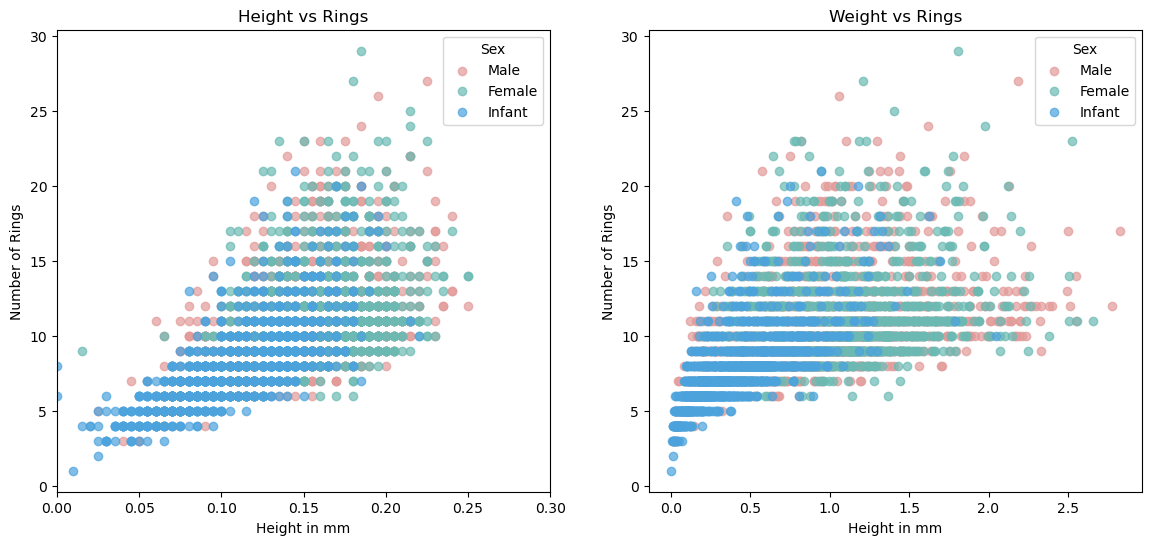

In [589]:
# Creates two scatter plots together so that we can compare the relationship between height and rings, and weight and rings
scatter_plots, axes= plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

#Creating a scatter plot of height and whole weight
axes[0].scatter(male['height'], male['rings'], color='#e29b99', alpha=0.7, label='Male')
axes[0].scatter(female['height'], female['rings'], color='#6bbab3', alpha=0.7, label='Female')
axes[0].scatter(infant['height'], infant['rings'], color='#4ca3dd', alpha=0.7, label='Infant')
axes[0].set_xlabel("Height in mm")
axes[0].set_ylabel("Number of Rings")
axes[0].set_title("Height vs Rings")
axes[0].set_xlim(0, 0.3) # Adjusts the range of the height values shown to remove the very extreme outliers
axes[0].legend(title="Sex")

axes[1].scatter(male['whole_weight'], male['rings'], color='#e29b99', alpha=0.7, label='Male')
axes[1].scatter(female['whole_weight'], female['rings'], color='#6bbab3', alpha=0.7, label='Female')
axes[1].scatter(infant['whole_weight'], infant['rings'], color='#4ca3dd', alpha=0.7, label='Infant')
axes[1].set_xlabel("Height in mm")
axes[1].set_ylabel("Number of Rings")
axes[1].set_title("Weight vs Rings")
axes[1].legend(title="Sex")

### Conclusion

The primary objective of this data analysis was to provide an overview of the data set and the relationship between the height and weight of abalone. Through the analysis we can see the strong positive correlation between height and weight of abalone which is consistent with the findings of previous studies. There was no significant difference between the height and weight of male and female abalone and so they are not determiners of gender. 

We can also see in other studies how the relationship between height, weight and number of rings have a moderate positive relationship, which can be seen in the scatter plots above. As mentioned previously number of rings can be used to determine the age of abalone. However while these measurements are related, they cannot serve as precise determiners of abalone age alone. 

### References

https://pandas.pydata.org/docs/user_guide/categorical.html

https://daringfireball.net/projects/markdown/basics

https://www.w3schools.com/python/python_datatypes.asp

https://pbpython.com/pandas_dtypes_cat.html

https://archive.ics.uci.edu/dataset/1/abalone

https://cogodata.co.za/wp-content/uploads/2021/01/CoGo_Abalone_data_Exploration.pdf

https://www.omdena.com/blog/data-life-cycle 